In [2]:
import pandas as pd
import seaborn as sns
import sklearn 
import numpy as np
import matplotlib as plt
from scipy import stats
import pandas_profiling
from sklearn.svm import SVR, NuSVR
from sklearn.preprocessing import StandardScaler


In [3]:
df_7 = pd.read_csv("data7.csv", header=None, sep=";")

In [4]:
df_7.columns = ["Date", "Value"]
df_7 = df_7.drop(columns=["Date"])

In [5]:
df_7.head(15)

,Value
0,45.057
1,46.823
2,46.823
3,46.823
4,45.920
5,45.796
6,45.924
7,46.857
8,50.025
9,50.025


In [6]:
def remove_zeros(df):
    df.loc[~(df==0).all(axis=1)]
    return df

((array([-3.31139706, -3.05464103, -2.91188422, ...,  2.91188422,
          3.05464103,  3.31139706]),
  array([  0.,   0.,   0., ..., 990., 990., 990.])),
 (45.393009804153166, 32.4182632283992, 0.4975124111103))

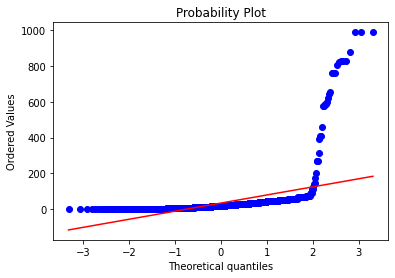

In [7]:
stats.probplot(df_7["Value"], plot=sns.mpl.pyplot)

In [8]:
df_7.head()

,Value
0,45.057
1,46.823
2,46.823
3,46.823
4,45.920


In [9]:
def predict_data(df, C):
    n = df.shape[0]
    norm_df = remove_zeros(df)
    norm_df = norm_df[norm_df["Value"] <= 150]
    df["Value"] = df["Value"].fillna(df["Value"].mean())
    df['Value'] = df['Value'].apply(lambda y: y if y <= 100 else df["Value"].mean())
    X = np.array([i for i in range(1, n + 1)]).reshape(-1, 1)
    
    new_dates_15 = np.array([i for i in range(1, n + 16)]).reshape(-1, 1)
    new_dates_30 = np.array([i for i in range(1, n + 31)]).reshape(-1, 1)
    new_dates_45 = np.array([i for i in range(1, n + 46)]).reshape(-1, 1)
    model = NuSVR(kernel="rbf", nu=0.3)
    model.fit(X=X, y=df["Value"])
    res_15 = model.predict(new_dates_15)
    res_30 = model.predict(new_dates_30)
    res_45 = model.predict(new_dates_45)
    
    return (res_15, res_30, res_45, df)

In [10]:
res_7_15, res_7_30, res_7_45, df_7 = predict_data(df_7, C=0.1)

<AxesSubplot:title={'center':'TD7'}>

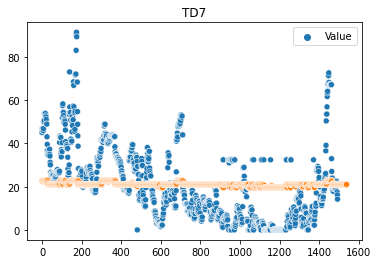

In [11]:
sns.scatterplot(data=df_7).set_title("TD7")
sns.scatterplot(data=res_7_45)

In [12]:
res_7_45[-45:]

array([21.41890984, 21.41890984, 21.41890984, 21.41890984, 21.41890984,
       21.41890984, 21.41890984, 21.41890984, 21.41890984, 21.41890984,
       21.41890984, 21.41890984, 21.41890984, 21.41890984, 21.41890984,
       21.41890984, 21.41890984, 21.41890984, 21.41890984, 21.41890984,
       21.41890984, 21.41890984, 21.41890984, 21.41890984, 21.41890984,
       21.41890984, 21.41890984, 21.41890984, 21.41890984, 21.41890984,
       21.41890984, 21.41890984, 21.41890984, 21.41890984, 21.41890984,
       21.41890984, 21.41890984, 21.41890984, 21.41890984, 21.41890984,
       21.41890984, 21.41890984, 21.41890984, 21.41890984, 21.41890984])

In [13]:
df_8 = pd.read_csv("data8.csv")
df_8.columns = ["Value"]
res_8_15, res_8_30, res_8_45, df_8 = predict_data(df_8, C=0.3)

<AxesSubplot:title={'center':'TD8'}>

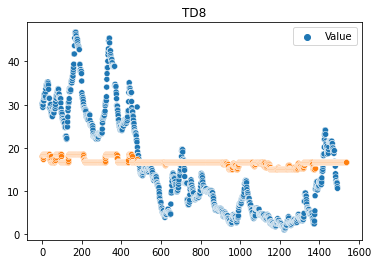

In [14]:
sns.scatterplot(data=df_8).set_title("TD8")
sns.scatterplot(data=res_8_45)

In [15]:
df_9 = pd.read_csv("data9.csv")
df_9.columns = ["Value"]

In [16]:
res_9_15, res_9_30, res_9_45, df_9 = predict_data(df_9, C=0.7)

<AxesSubplot:title={'center':'TD9'}>

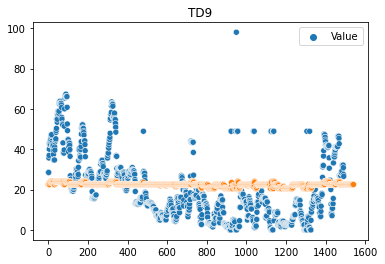

In [17]:
sns.scatterplot(data=df_9).set_title("TD9")
sns.scatterplot(data=res_9_45)

In [18]:
df_14 = pd.read_csv("data14.csv")
df_14.columns = ["Value"]
res_14_15, res_14_30, res_14_45, df_14 = predict_data(df_14, C=0.1)

<AxesSubplot:title={'center':'TD14'}>

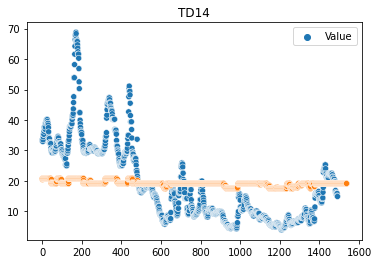

In [19]:
sns.scatterplot(data=df_14).set_title("TD14")
sns.scatterplot(data=res_14_45)

In [20]:
df_17 = pd.read_csv("data17.csv")
df_17.columns = ["Value"]
res_17_15, res_17_30, res_17_45, df_17 = predict_data(df_17, C=0.2)

<AxesSubplot:title={'center':'TD17'}>

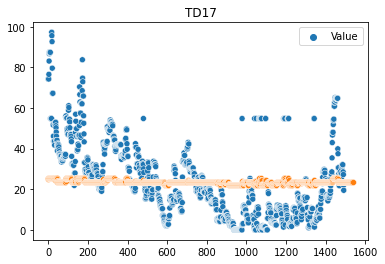

In [21]:
sns.scatterplot(data=df_17).set_title("TD17")
sns.scatterplot(data=res_17_45)

In [22]:
df_19 = pd.read_csv("data19.csv")
df_19.columns = ["Value"]
res_19_15, res_19_30, res_19_45, df_19 = predict_data(df_19, C=0.25)

<AxesSubplot:title={'center':'TD19'}>

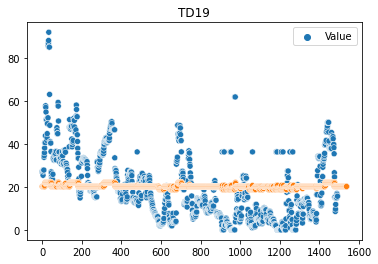

In [23]:
sns.scatterplot(data=df_19).set_title("TD19")
sns.scatterplot(data=res_19_45)

In [24]:
def create_csv(name, res1, res2, res3):
    max_len = max(max(len(res1), len(res2)), len(res3))
    for i in range(max_len):
        try:
            x = res1[i]
        except Exception:
            res1 = np.append(res1, [0], axis=0)
        try:
            x = res2[i]
        except Exception:
            res2 = np.append(res2, [0], axis=0)
        try:
            x = res3[i]
        except Exception:
            res3 = np.append(res3, [0], axis=0)
    df = pd.DataFrame({
        "res15": res1,
        "res30": res2, 
        "res45": res3
    })
    df.to_csv(name, index=False)

In [25]:
create_csv("res_14.csv", res_14_15, res_14_30, res_14_45)

In [26]:
create_csv("res_17.csv", res_17_15, res_17_30, res_17_45)

In [27]:
create_csv("res_19.csv", res_19_15, res_19_30, res_19_45)

In [28]:
create_csv("res_7.csv", res_7_15, res_7_30, res_7_45)

In [29]:
create_csv("res_8.csv", res_8_15, res_8_30, res_8_45)

In [30]:
create_csv("res_9.csv", res_9_15, res_9_30, res_9_45)

In [31]:
print(res_7_15.shape)

(1508,)


In [32]:
df_7.head()

,Value
0,45.057
1,46.823
2,46.823
3,46.823
4,45.920


In [33]:
res_14_15[-15:-3]

array([19.35862689, 19.35862689, 19.35862689, 19.35862689, 19.35862689,
       19.35862689, 19.35862689, 19.35862689, 19.35862689, 19.35862689,
       19.35862689, 19.35862689])

In [34]:
res_7_15[-16:-10]

array([21.41890984, 21.41890984, 21.41890984, 21.41890984, 21.41890984,
       21.41890984])

In [35]:
res_9_15[-17]

22.544452215017934